In [2]:
import pandas as pd    
import numpy as np      
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas import Timestamp

In [3]:
data = pd.read_csv('D:/이찬빈/세종대 4-1학기/시계열/프로젝트/Gatun_Lake_Water_Level_Monthly_Mean.csv', encoding = 'utf-8')
data

,DATE_LOG,GATUN_LAKE_LEVEL(FEET)
0,1965-01-31,86.363548
1,1965-02-28,85.753571
2,1965-03-31,84.521935
3,1965-04-30,83.380667
4,1965-05-31,82.677742
...,...,...
696,2024-01-31,81.437742
697,2024-02-29,80.986207
698,2024-03-31,80.518065
699,2024-04-30,80.302000


In [4]:
date_list = data['DATE_LOG'].tolist()
date_list

['1965-01-31',
 '1965-02-28',
 '1965-03-31',
 '1965-04-30',
 '1965-05-31',
 '1965-06-30',
 '1965-07-31',
 '1965-08-31',
 '1965-09-30',
 '1965-10-31',
 '1965-11-30',
 '1965-12-31',
 '1966-01-31',
 '1966-02-28',
 '1966-03-31',
 '1966-04-30',
 '1966-05-31',
 '1966-06-30',
 '1966-07-31',
 '1966-08-31',
 '1966-09-30',
 '1966-10-31',
 '1966-11-30',
 '1966-12-31',
 '1967-01-31',
 '1967-02-28',
 '1967-03-31',
 '1967-04-30',
 '1967-05-31',
 '1967-06-30',
 '1967-07-31',
 '1967-08-31',
 '1967-09-30',
 '1967-10-31',
 '1967-11-30',
 '1967-12-31',
 '1968-01-31',
 '1968-02-29',
 '1968-03-31',
 '1968-04-30',
 '1968-05-31',
 '1968-06-30',
 '1968-07-31',
 '1968-08-31',
 '1968-09-30',
 '1968-10-31',
 '1968-11-30',
 '1968-12-31',
 '1969-01-31',
 '1969-02-28',
 '1969-03-31',
 '1969-04-30',
 '1969-05-31',
 '1969-06-30',
 '1969-07-31',
 '1969-08-31',
 '1969-09-30',
 '1969-10-31',
 '1969-11-30',
 '1969-12-31',
 '1970-01-31',
 '1970-02-28',
 '1970-03-31',
 '1970-04-30',
 '1970-05-31',
 '1970-06-30',
 '1970-07-

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE_LOG                701 non-null    object 
 1   GATUN_LAKE_LEVEL(FEET)  701 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [6]:
# Preprocess the data
data['DATE_LOG'] = pd.to_datetime(data['DATE_LOG'])

# Extract additional features from Date
data['Year'] = data['DATE_LOG'].dt.year
data['Month'] = data['DATE_LOG'].dt.month
data['Day'] = data['DATE_LOG'].dt.day
data['Season'] = data['DATE_LOG'].dt.month % 12 // 3 + 1

In [7]:
data = data.set_index('DATE_LOG')

In [8]:
#data = data.drop(columns=['DATE_LOG']) #'Unnamed: 0', 'Note'

In [9]:
data.columns

Index(['GATUN_LAKE_LEVEL(FEET)', 'Year', 'Month', 'Day', 'Season'], dtype='object')

In [10]:
# Rename columns for easier access
data.rename(columns = {'GATUN_LAKE_LEVEL(FEET)' : 'Gatun_Lake_Level'}, inplace=True) #'Neopanamax (beam >= 107)' : 'Neopanamax', 

In [11]:
# Fill any missing values if necessary
data = data.fillna(method='ffill')

In [12]:
data

,Gatun_Lake_Level,Year,Month,Day,Season
DATE_LOG,,,,,
1965-01-31,86.363548,1965,1,31,1
1965-02-28,85.753571,1965,2,28,1
1965-03-31,84.521935,1965,3,31,2
1965-04-30,83.380667,1965,4,30,2
1965-05-31,82.677742,1965,5,31,2
...,...,...,...,...,...
2024-01-31,81.437742,2024,1,31,1
2024-02-29,80.986207,2024,2,29,1
2024-03-31,80.518065,2024,3,31,2


In [13]:
# Feature Engineering - Creating lag features
for lag in range(1, 13):
    data[f'Lag_{lag}'] = data['Gatun_Lake_Level'].shift(lag)

In [14]:
# Drop rows with NaN values created by lag features
data = data.dropna()

In [15]:
data

,Gatun_Lake_Level,Year,Month,Day,Season,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
DATE_LOG,,,,,,,,,,,,,,,,,
1966-01-31,86.875161,1966,1,31,1,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935,85.753571,86.363548
1966-02-28,85.767500,1966,2,28,1,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935,85.753571
1966-03-31,84.463226,1966,3,31,2,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935
1966-04-30,83.765000,1966,4,30,2,84.463226,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667
1966-05-31,84.023226,1966,5,31,2,83.765000,84.463226,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,81.437742,2024,1,31,1,81.565484,80.995333,79.763226,79.754667,79.603226,79.536452,79.785333,80.931613,83.007667,84.467742,85.617857,87.082258
2024-02-29,80.986207,2024,2,29,1,81.437742,81.565484,80.995333,79.763226,79.754667,79.603226,79.536452,79.785333,80.931613,83.007667,84.467742,85.617857
2024-03-31,80.518065,2024,3,31,2,80.986207,81.437742,81.565484,80.995333,79.763226,79.754667,79.603226,79.536452,79.785333,80.931613,83.007667,84.467742


### V1
#### 사용한 피처 : Year, Month, Day, Season, Lag1 ~ Lag12

추가할 피처

1. 건기 / 우기
2. 월평균

In [16]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data.drop(columns=['Gatun_Lake_Level'])
y_train = train_data['Gatun_Lake_Level']
X_test = test_data.drop(columns=['Gatun_Lake_Level'])
y_test = test_data['Gatun_Lake_Level']

# Prepare the LightGBM dataset
train_dataset = lgb.Dataset(X_train, label=y_train)
test_dataset = lgb.Dataset(X_test, label=y_test, reference=train_dataset)

In [17]:
# Set up LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 15,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [18]:
# LightGBM 모델 훈련
model = lgb.train(params, train_dataset, num_boost_round=1000, valid_sets=[train_dataset, test_dataset], early_stopping_rounds=50) #verbose_eval = 100

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2278
[LightGBM] [Info] Number of data points in the train set: 551, number of used features: 16
[LightGBM] [Info] Start training from score 85.637122
[1]	training's rmse: 1.34076	valid_1's rmse: 2.88081
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.28593	valid_1's rmse: 2.77779
[3]	training's rmse: 1.23409	valid_1's rmse: 2.68051
[4]	training's rmse: 1.18495	valid_1's rmse: 2.58725
[5]	training's rmse: 1.1385	valid_1's rmse: 2.49947
[6]	training's rmse: 1.09438	valid_1's rmse: 2.41603
[7]	training's rmse: 1.06158	valid_1's rmse: 2.36887
[8]	training's rmse: 1.02204	valid_1's rmse: 2.29339
[9]	training's rmse: 0.985288	valid_1's rmse: 2.22298
[10]	training's rmse: 0.950024	valid_1's rmse: 2.15509
[11]	training's rmse: 0.916713	valid_1's rmse: 2.09898
[12]	tra

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [19]:
print(len(date_list[train_size:]))
date_list[train_size:]

150


['2011-12-31',
 '2012-01-31',
 '2012-02-29',
 '2012-03-31',
 '2012-04-30',
 '2012-05-31',
 '2012-06-30',
 '2012-07-31',
 '2012-08-31',
 '2012-09-30',
 '2012-10-31',
 '2012-11-30',
 '2012-12-31',
 '2013-01-31',
 '2013-02-28',
 '2013-03-31',
 '2013-04-30',
 '2013-05-31',
 '2013-06-30',
 '2013-07-31',
 '2013-08-31',
 '2013-09-30',
 '2013-10-31',
 '2013-11-30',
 '2013-12-31',
 '2014-01-31',
 '2014-02-28',
 '2014-03-31',
 '2014-04-30',
 '2014-05-31',
 '2014-06-30',
 '2014-07-31',
 '2014-08-31',
 '2014-09-30',
 '2014-10-31',
 '2014-11-30',
 '2014-12-31',
 '2015-01-31',
 '2015-02-28',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-

In [20]:
test = date_list[train_size:]
test[0]

'2011-12-31'

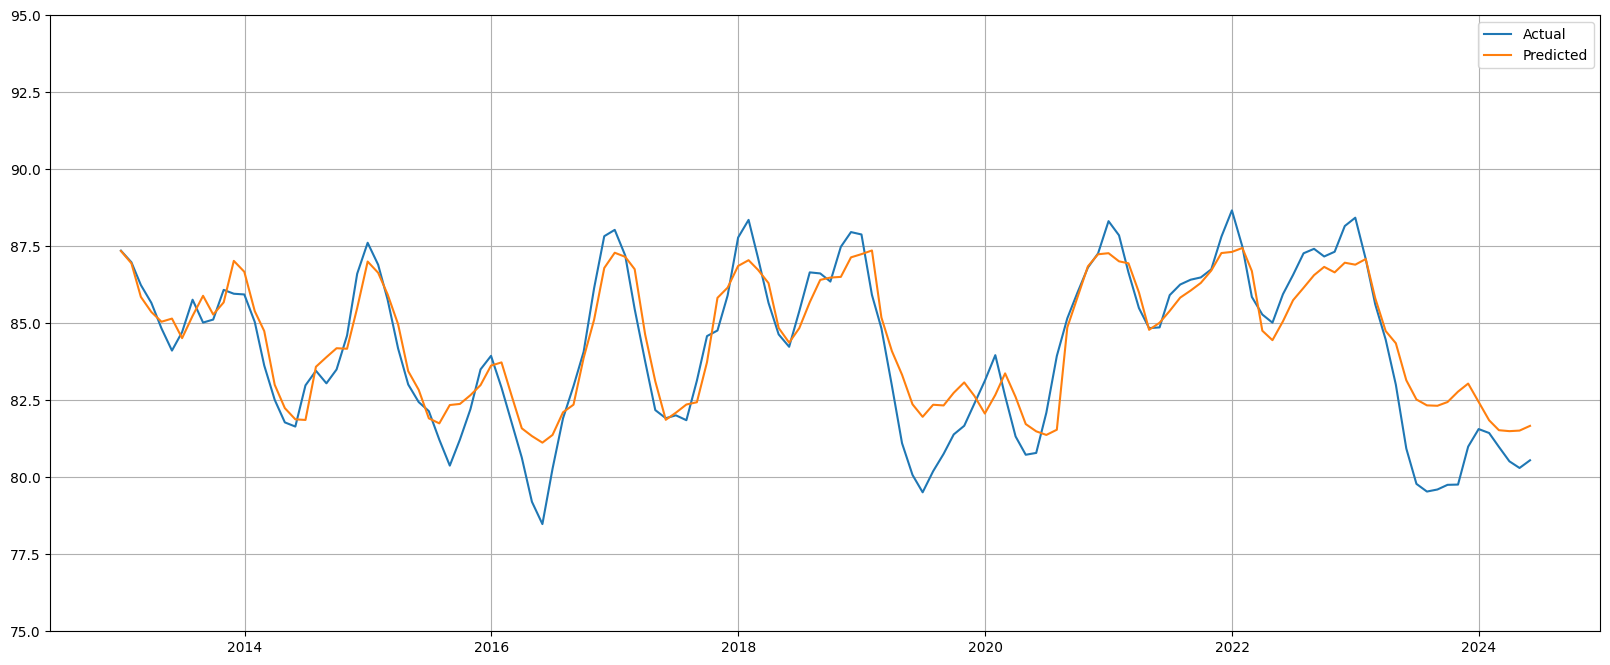

<Figure size 640x480 with 0 Axes>

In [21]:
#labels = ['2012-06-25', '2013-06-25', '2014-06-25', '2015-06-25', '2016-06-25', '2017-06-25', '2018-06-25', '2019-06-25', '2020-06-25', '2021-06-25', '2022-06-25', '2023-06-25']

# Plot the results
plt.figure(figsize=(20, 8))
plt.grid()
plt.ylim([75, 95])
#plt.xticks(np.arange(len(data[train_size:]), 365), labels = labels)

plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], y_pred, label='Predicted')
#plt.xticks(np.arange(int(len(date_list) * 2)), labels = date_list[train_size:], rotation = 90)
plt.legend()
plt.show()
plt.savefig('V1_visualization.png')

### 피처를 추가할 필요가 있어보임

In [22]:
# train_21=np.log(data[data.index <='2021-12-31'])
# test_21=np.log(data[data.index >'2021-12-31'])

In [23]:
# train_23=np.log(data[data.index <='2023-12-31'])
# test_23=np.log(data[data.index >'2023-12-31'])

In [24]:
# train_24=np.log(data[data.index <='2024-05-31'])

In [25]:
after_index=['2024-06-30','2024-07-31','2024-08-31','2024-09-30','2024-10-31','2024-11-30','2024-12-31','2025-01-31','2025-02-28','2025-03-31','2025-04-30','2025-05-31']
forecast = [0] * len(after_index)
forecast_df = pd.DataFrame({'DATE_LOG' : after_index, 'Gatun_Lake_Level' : forecast})

forecast_df['DATE_LOG'] = pd.to_datetime(forecast_df['DATE_LOG'])

# Extract additional features from Date
forecast_df['Year'] = forecast_df['DATE_LOG'].dt.year
forecast_df['Month'] = forecast_df['DATE_LOG'].dt.month
forecast_df['Day'] = forecast_df['DATE_LOG'].dt.day
forecast_df['Season'] = forecast_df['DATE_LOG'].dt.month % 12 // 3 + 1

forecast_df = forecast_df.set_index('DATE_LOG')

#Feature Engineering - Creating lag features
for lag in range(1, 13):
    forecast_df[f'Lag_{lag}'] = forecast_df['Gatun_Lake_Level'].shift(lag)
    
# forecast_df = forecast_df.dropna()

forecast_df.drop('Gatun_Lake_Level', axis = 1, inplace=True)

forecast_df

,Year,Month,Day,Season,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
DATE_LOG,,,,,,,,,,,,,,,,
2024-06-30,2024,6,30,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-31,2024,7,31,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-31,2024,8,31,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,2024,9,30,4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,2024,10,31,4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-30,2024,11,30,4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31,2024,12,31,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,2025,1,31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2025-02-28,2025,2,28,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
# Split the data into train and test sets

# 기준 날짜 설정
split_date = '2021-12-31'
split_date = pd.to_datetime(split_date)

train_21=data[data.index <=split_date]
test_21=data[data.index >split_date]

X_train_21 = train_21.drop(columns=['Gatun_Lake_Level'])
y_train_21 = train_21['Gatun_Lake_Level']
X_test_21 = test_21.drop(columns=['Gatun_Lake_Level'])
y_test_21 = test_21['Gatun_Lake_Level']

# Prepare the LightGBM dataset
train_dataset_21 = lgb.Dataset(X_train_21, label=y_train_21)
test_dataset_21 = lgb.Dataset(X_test_21, label=y_test_21, reference=train_dataset_21)

# LightGBM 모델 훈련
model_21 = lgb.train(params, train_dataset_21, num_boost_round=1000, valid_sets=[train_dataset_21, test_dataset_21], early_stopping_rounds=50) #verbose_eval = 100

# Make predictions
y_pred_21 = model_21.predict(X_test_21, num_iteration=model_21.best_iteration)

# Calculate RMSE
rmse_21 = np.sqrt(mean_squared_error(y_test_21, y_pred_21))
print(f'RMSE: {rmse_21}')

forecast_21 = model_21.predict(forecast_df, num_iteration=model_21.best_iteration)

forecast_21_df = pd.DataFrame({'DATE_LOG' : forecast_df.index, 'pred_21' : forecast_21})
forecast_21_df = forecast_21_df.set_index('DATE_LOG')

y_pred_21_df = pd.DataFrame({'pred_21' : y_pred_21})
y_pred_21_df.index = test_21.index

concat_21 = pd.concat([y_pred_21_df, forecast_21_df])
concat_21

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 16
[LightGBM] [Info] Start training from score 85.420333
[1]	training's rmse: 1.61624	valid_1's rmse: 3.44551
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.54696	valid_1's rmse: 3.29915
[3]	training's rmse: 1.48219	valid_1's rmse: 3.16298
[4]	training's rmse: 1.42043	valid_1's rmse: 3.03284
[5]	training's rmse: 1.36254	valid_1's rmse: 2.91273
[6]	training's rmse: 1.30703	valid_1's rmse: 2.79797
[7]	training's rmse: 1.26122	valid_1's rmse: 2.72235
[8]	training's rmse: 1.21131	valid_1's rmse: 2.61319
[9]	training's rmse: 1.16417	valid_1's rmse: 2.51471
[10]	training's rmse: 1.12019	valid_1's rmse: 2.42078


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


,pred_21
DATE_LOG,
2022-01-31,87.628001
2022-02-28,86.779012
2022-03-31,84.874877
2022-04-30,84.488856
2022-05-31,85.266277
2022-06-30,86.091653
2022-07-31,86.510061
2022-08-31,87.270708
2022-09-30,87.179250


In [38]:
X_train_21

,Year,Month,Day,Season,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
DATE_LOG,,,,,,,,,,,,,,,,
1966-01-31,1966,1,31,1,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935,85.753571,86.363548
1966-02-28,1966,2,28,1,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935,85.753571
1966-03-31,1966,3,31,2,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667,84.521935
1966-04-30,1966,4,30,2,84.463226,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742,83.380667
1966-05-31,1966,5,31,2,83.765000,84.463226,85.767500,86.875161,87.414839,86.772333,84.405484,83.161333,82.730968,82.419677,82.762667,82.677742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2021,8,31,3,86.258387,85.914000,84.866452,84.843000,85.491935,86.649643,87.855161,88.315806,87.268667,86.810323,85.994333,85.160968
2021-09-30,2021,9,30,4,86.414839,86.258387,85.914000,84.866452,84.843000,85.491935,86.649643,87.855161,88.315806,87.268667,86.810323,85.994333
2021-10-31,2021,10,31,4,86.488667,86.414839,86.258387,85.914000,84.866452,84.843000,85.491935,86.649643,87.855161,88.315806,87.268667,86.810323


In [27]:
# Split the data into train and test sets

# 기준 날짜 설정
split_date = '2023-12-31'
split_date = pd.to_datetime(split_date)

train_23=data[data.index <=split_date]
test_23=data[data.index >split_date]

X_train_23 = train_23.drop(columns=['Gatun_Lake_Level'])
y_train_23 = train_23['Gatun_Lake_Level']
X_test_23 = test_23.drop(columns=['Gatun_Lake_Level'])
y_test_23 = test_23['Gatun_Lake_Level']

# Prepare the LightGBM dataset
train_dataset_23 = lgb.Dataset(X_train_23, label=y_train_23)
test_dataset_23 = lgb.Dataset(X_test_23, label=y_test_23, reference=train_dataset_23)

# LightGBM 모델 훈련
model_23 = lgb.train(params, train_dataset_23, num_boost_round=1000, valid_sets=[train_dataset_23, test_dataset_23], early_stopping_rounds=50) #verbose_eval = 100

# Make predictions
y_pred_23 = model_23.predict(X_test_23, num_iteration=model_23.best_iteration)

# Calculate RMSE
rmse_23 = np.sqrt(mean_squared_error(y_test_23, y_pred_23))
print(f'RMSE: {rmse_23}')

forecast_23 = model_23.predict(forecast_df, num_iteration=model_23.best_iteration)

forecast_23_df = pd.DataFrame({'DATE_LOG' : forecast_df.index, 'pred_21' : forecast_23})
forecast_23_df = forecast_23_df.set_index('DATE_LOG')

y_pred_23_df = pd.DataFrame({'pred_21' : y_pred_23})
y_pred_23_df.index = test_23.index

concat_23 = pd.concat([y_pred_23_df, forecast_23_df])
concat_23

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.


[LightGBM] [Info] Total Bins 2829
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] Start training from score 85.382251
[1]	training's rmse: 1.69389	valid_1's rmse: 4.42282
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.62	valid_1's rmse: 4.22125
[3]	training's rmse: 1.55131	valid_1's rmse: 4.01144
[4]	training's rmse: 1.48509	valid_1's rmse: 3.82784
[5]	training's rmse: 1.42353	valid_1's rmse: 3.63825
[6]	training's rmse: 1.36423	valid_1's rmse: 3.47188
[7]	training's rmse: 1.31525	valid_1's rmse: 3.31851
[8]	training's rmse: 1.26212	valid_1's rmse: 3.16732
[9]	training's rmse: 1.21262	valid_1's rmse: 3.01127
[10]	training's rmse: 1.1656	valid_1's rmse: 2.87425
[11]	training's rmse: 1.12188	valid_1's rmse: 2.73326
[12]	training's rmse: 1.07955	valid_1's rmse: 2.60907
[13]	training's rmse: 1.04028	valid_1's rmse: 2.49121
[14]	training's rmse: 1.00804	valid_1's rmse: 2.37201
[15]	training's r

,pred_21
DATE_LOG,
2024-01-31,81.660788
2024-02-29,81.590688
2024-03-31,80.597423
2024-04-30,80.590621
2024-05-31,80.629952
2024-06-30,81.157695
2024-07-31,81.157695
2024-08-31,81.157695
2024-09-30,81.157695


In [28]:
# Split the data into train and test sets

# 기준 날짜 설정
split_date = '2024-04-30'
split_date = pd.to_datetime(split_date)

train_24=data[data.index <=split_date]
test_24=data[data.index >split_date]

X_train_24 = train_24.drop(columns=['Gatun_Lake_Level'])
y_train_24 = train_24['Gatun_Lake_Level']
X_test_24 = test_24.drop(columns=['Gatun_Lake_Level'])
y_test_24 = test_24['Gatun_Lake_Level']

# Prepare the LightGBM dataset
train_dataset_24 = lgb.Dataset(X_train_24, label=y_train_24)
test_dataset_24 = lgb.Dataset(X_test_24, label=y_test_24, reference=train_dataset_24)

# LightGBM 모델 훈련
model_24 = lgb.train(params, train_dataset_24, num_boost_round=1000, valid_sets=[train_dataset_24, test_dataset_24], early_stopping_rounds=50) #verbose_eval = 100

# Make predictions
y_pred_24 = model_24.predict(X_test_24, num_iteration=model_24.best_iteration)

# Calculate RMSE
rmse_24 = np.sqrt(mean_squared_error(y_test_24, y_pred_24))
print(f'RMSE: {rmse_24}')

forecast_24 = model_24.predict(forecast_df, num_iteration=model_24.best_iteration)

forecast_24_df = pd.DataFrame({'DATE_LOG' : forecast_df.index, 'pred_21' : forecast_24})
forecast_24_df = forecast_24_df.set_index('DATE_LOG')

y_pred_24_df = pd.DataFrame({'pred_21' : y_pred_24})
y_pred_24_df.index = test_24.index

concat_24= pd.concat([y_pred_24_df, forecast_24_df])
concat_24

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 16
[LightGBM] [Info] Start training from score 85.355674
[1]	training's rmse: 1.72165	valid_1's rmse: 4.5733
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.64674	valid_1's rmse: 4.35397
[3]	training's rmse: 1.57629	valid_1's rmse: 4.1456
[4]	training's rmse: 1.50875	valid_1's rmse: 3.93853
[5]	training's rmse: 1.44538	valid_1's rmse: 3.75031
[6]	training's rmse: 1.38599	valid_1's rmse: 3.57151
[7]	training's rmse: 1.3358	valid_1's rmse: 3.41125
[8]	training's rmse: 1.28123	valid_1's rmse: 3.23542
[9]	training's rmse: 1.2304	valid_1's rmse: 3.07269
[10]	training's rmse: 1.18279	valid_1's rmse: 2.92549
[11]	training's rmse: 1.13768	valid_1's rmse: 2.77394
[12]	training'

,pred_21
DATE_LOG,
2024-05-31,80.545852
2024-06-30,81.035888
2024-07-31,81.177021
2024-08-31,81.177021
2024-09-30,81.177021
2024-10-31,81.177021
2024-11-30,81.177021
2024-12-31,81.177021
2025-01-31,80.545852


In [29]:
# fig, ax = plt.subplots(figsize=(20, 8))
# ax.plot(df[df.index>='2020-01-01'].index, np.log(df[df.index>='2020-01-01']), label = 'True')
# ax.plot(fcast21.index, fcast21, label = 'Prediction 21')
# ax.plot(fcast23.index, fcast23, label = 'Prediction 23')
# ax.plot(fcast24.index, fcast24, label = 'Prediction 24')
# ax.vlines(Timestamp('2024-05-31'), 4.34, 4.5, linestyle='--', color='r', label='Start of Forecast')
# ax.fill_between(fcast21.index, b_21[:,0], b_21[:,1], color = 'brown', alpha = 0.1, label='0.95 Prediction Interval')
# ax.fill_between(fcast23.index, b_23[:,0], b_23[:,1], color = 'green', alpha = 0.1, label='0.95 Prediction Interval')
# ax.fill_between(fcast24.index, b_24[:,0], b_24[:,1], color = 'red', alpha = 0.1, label='0.95 Prediction Interval')

# ax.legend(loc='upper left')
# plt.show()

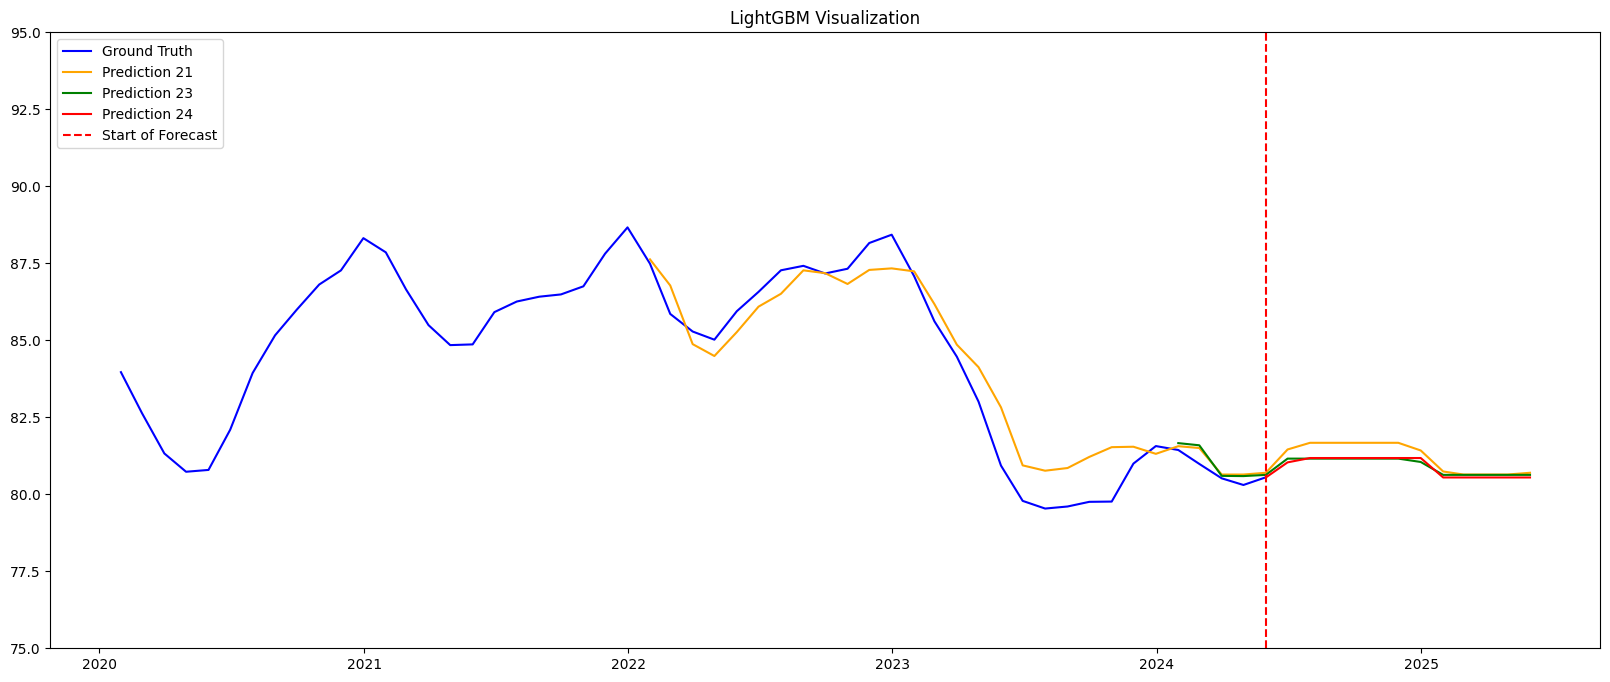

In [30]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data['Gatun_Lake_Level'][data['Gatun_Lake_Level'].index>='2020-01-01'],color='blue', label = 'Ground Truth')
ax.plot(concat_21, color='orange', label='Prediction 21')
ax.plot(concat_23, color='green', label='Prediction 23')
ax.plot(concat_24, color='red', label='Prediction 24')
ax.vlines(Timestamp('2024-05-31'), 75, 95, linestyle='--', color='r', label='Start of Forecast')
plt.ylim([75, 95])
plt.title("LightGBM Visualization")
ax.legend(loc='upper left')
plt.show()

In [39]:
concat_21

,pred_21
DATE_LOG,
2022-01-31,87.628001
2022-02-28,86.779012
2022-03-31,84.874877
2022-04-30,84.488856
2022-05-31,85.266277
2022-06-30,86.091653
2022-07-31,86.510061
2022-08-31,87.270708
2022-09-30,87.179250


In [33]:
train_dataset_21

In [31]:
y_pred_21_df

,pred_21
DATE_LOG,
2022-01-31,87.628001
2022-02-28,86.779012
2022-03-31,84.874877
2022-04-30,84.488856
2022-05-31,85.266277
2022-06-30,86.091653
2022-07-31,86.510061
2022-08-31,87.270708
2022-09-30,87.179250


In [32]:
concat_21.to_csv('LightGBM_21.csv', encoding='utf-8-sig')
concat_23.to_csv('LightGBM_23.csv', encoding='utf-8-sig')
concat_24.to_csv('LightGBM_24.csv', encoding='utf-8-sig')